## 0) Introduction + Ideas Brainstorming
If you haven't read the main readme yet, give it a go: https://github.com/pifparfait/qmprot_strategy

Also, read the paper: https://www.arxiv.org/abs/2505.08956

And take a look at the structure of the data: https://github.com/pifparfait/qmprot_strategy/blob/main/Quantum%20Strategy%20for%20the%20Simulation%20of%20Large%20Proteins/QMProt.json


### 0a) Hamiltonians
They also provide the code with which they used to compute the hamiltonians here: https://github.com/pifparfait/qmprot_strategy/blob/main/QMProt/hamiltonian.ipynb

We can calculate hamiltonians ourselves, given that we know the molecular coordinates of every molecule. I believe it should be possible to extract this from the PDB files? Might be computationally heavy, should be a fun mini-project for someone to explore in 30 minutes or so.

For those of you who are interested in what a hamiltonian is, in the context of quantum chemistry

### 0b) Calculating excited states.
We're given the ground-state energies. Perhaps it would be worthwhile (e.g. a few slides on a presentation, or a cute little poster) to calculate first/second excited states. To be precise, because they're not exactly atoms, so the 'first excited' state will be whatever we find on google, as we make a table (with citations!!!).

Or if we want to make this a big project, we could investigate systematically (one at a time) exciting all the electrons in a small molecule, and calculating how much energy each takes.

But it is complicated. the tendency of electrons in certain orbitals to be excited changes depends on pH (protonation of amino and carboxyl groups, for example), the solvent, etc. However, to simplify things, we can just assume normal human cellular conditions and not worry about other molecules nearby to affect polarity/etc. etc. etc.

## 1) Misc notes about QMProt
Some of the proteins are nonsense big, and probably not worth exploring at all...
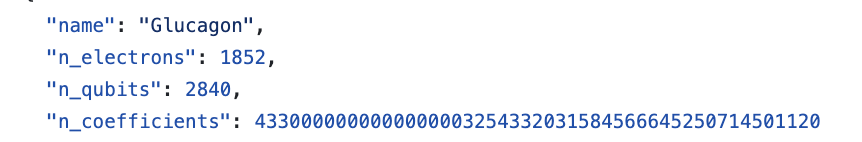

## 2) I'll do this tomorrow, but it will be a summary of docs/links you can quickly skim/read to get an understanding of what quantum chemistry is.

For now, take a look at this:
* https://pennylane.ai/qml/demos/tutorial_vqe
* will show you how to calculate ground and first excited state of hydrogen. our molecules are, of course, more complex, but understanding this yourself is probably quite important.

Glycine, with 60 required qubits, is the simplest of them all.

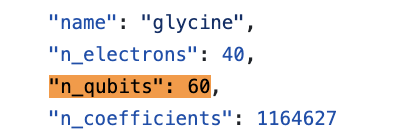

## Z) misc notes about og project

made a few discoveries about how the quantum layer isn't actually helpful with this dataset --> but how many qubits it would take to BE helpful

##) Playground

In [1]:
!pip install qiskit qiskit-nature


  Using cached qiskit-2.1.1-cp39-abi3-win_amd64.whl.metadata (13 kB)
  Using cached rustworkx-0.16.0-cp39-abi3-win_amd64.whl.metadata (10 kB)
  Using cached dill-0.4.0-py3-none-any.whl.metadata (10 kB)
  Using cached stevedore-5.4.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached qiskit_algorithms-0.3.1-py3-none-any.whl.metadata (4.2 kB)
  Using cached pbr-6.1.1-py2.py3-none-any.whl.metadata (3.4 kB)
Using cached qiskit-2.1.1-cp39-abi3-win_amd64.whl (7.2 MB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.2 MB 2.8 MB/s eta 0:00:01
   ----------------------------- ---------- 1.6/2.2 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 4.6 MB/s eta 0:00:00
Using cached dill-0.4.0-py3-none-any.whl (119 kB)
Using cached qiskit_algorithms-0.3.1-py3-none-any.whl (310 kB)
Using cached rustworkx-0.16.0-cp39-abi3-win_amd64.whl (2.0 MB)
Using cached stevedore-5.4.1-py3-none-any.whl (49 kB)
Using ca

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload 'hamiltonian_gly.txt'

In [2]:
from qiskit_nature.second_q.operators import FermionicOp
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.hamiltonians import ElectronicEnergy
from qiskit_nature.second_q.problems import ElectronicStructureProblem
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer

# Load the Fermionic Hamiltonian from a text file
with open('hamiltonian_gly.txt', 'r') as f:
    hamiltonian_str = f.read()

# Convert string to FermionicOp (assuming OpenFermion-style format)
fer_op = FermionicOp.from_openfermion(hamiltonian_str)

# Optional: map to qubit Hamiltonian
mapper = JordanWignerMapper()
qubit_op = mapper.map(fer_op)


ImportError: cannot import name 'BaseSampler' from 'qiskit.primitives' (c:\Users\iclyd\anaconda3\envs\fetch\Lib\site-packages\qiskit\primitives\__init__.py)

In [ ]:
from qiskit.algorithms.minimum_eigensolvers import VQD
from qiskit.algorithms.optimizers import SLSQP
from qiskit.circuit.library import TwoLocal
from qiskit.primitives import Estimator
from qiskit.utils import algorithm_globals

# Set seed for reproducibility
algorithm_globals.random_seed = 42

# Define ansatz (hardware-efficient)
ansatz = TwoLocal(rotation_blocks='ry', entanglement_blocks='cz',
                  entanglement='full', reps=2)

# Define estimator and optimizer
estimator = Estimator()
optimizer = SLSQP(maxiter=200)

# Run VQD to find first 2 eigenstates (ground + excited)
vqd_solver = VQD(ansatz=ansatz, estimator=estimator, optimizer=optimizer, k=2)

# Run the solver
result = vqd_solver.compute_eigenvalues(qubit_op)

# Print energies
for i, energy in enumerate(result.eigenvalues):
    print(f"State {i} energy: {energy:.6f} Hartree")

print(f"Excitation energy: {result.eigenvalues[1] - result.eigenvalues[0]:.6f} Hartree")


In [3]:
!pip install pennylane

  Using cached autograd-1.8.0-py3-none-any.whl.metadata (7.5 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached cachetools-6.1.0-py3-none-any.whl.metadata (5.4 kB)
  Using cached requests-2.32.4-py3-none-any.whl.metadata (4.9 kB)
  Using cached tomlkit-0.13.3-py3-none-any.whl.metadata (2.8 kB)
  Using cached diastatic_malt-2.15.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached charset_normalizer-3.4.2-cp313-cp313-win_amd64.whl.metadata (36 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
   ---------------------------------------- 0.0/4.8 MB ? eta -:--:--
   ------ --------------------------------- 0.8/4.8 MB 5.0 MB/s eta 0:00:01
   --------------- ------------------------ 1.8/

In [ ]:
import pennylane as qml
coefficients = []
operators = []
hamiltonian_chunks = []

# Download the dataset and retrieve the Hamiltonian chunks
datasets = qml.data.load('other', name='cys')

# Assuming the first dataset in the list is the one we want
if datasets:
    ds = datasets[0]
    for key in ds.list_attributes():  # Sort the keys to preserve the correct sequence
        if "hamiltonian" in key:
            hamiltonian_chunks.append(getattr(ds, key))  # Decode bytes to string

# Combine all Hamiltonian chunks into a single string
full_hamiltonian = "".join(hamiltonian_chunks)

# Helper function to convert a string representation into a PennyLane operator
def string_to_operator(op_string):
    if "Identity" in op_string:
        return qml.Identity(0)  # Identity defaults to acting on qubit 0

    terms = op_string.split(" @ ")  # Separate tensor product terms
    ops = []

    for term in terms:
        try:
            op, wire = term.split("(")
            wire = int(wire.strip(")"))  # Extract the qubit index
            if op == "X":
                ops.append(qml.PauliX(wire))
            elif op == "Y":
                ops.append(qml.PauliY(wire))
            elif op == "Z":
                ops.append(qml.PauliZ(wire))
        except ValueError:
            continue  # Skip malformed lines

    return qml.prod(*ops) if len(ops) > 1 else ops[0]  # Create composite operator if needed

# Process each line of the combined Hamiltonian string
for line in full_hamiltonian.split("\n"):
    line = line.strip()
    if not line or "Coefficient" in line or "Operators" in line:
        continue  # Skip empty lines or header lines

    parts = line.split()

    try:
        coeff = float(parts[0])  # Extract the coefficient
        op_string = " ".join(parts[1:])  # Extract the operators
        coefficients.append(coeff)
        operators.append(string_to_operator(op_string))
    except ValueError:
        continue  # Gracefully handle conversion errors

# Build the PennyLane Hamiltonian
hamiltonian = qml.Hamiltonian(coefficients, operators)

In [ ]:
print*("PennyLane Hamiltonian:")
print(hamiltonian)